<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [2]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-3-4df13306bf58>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Boxplot for the median value of owner-occupied homes

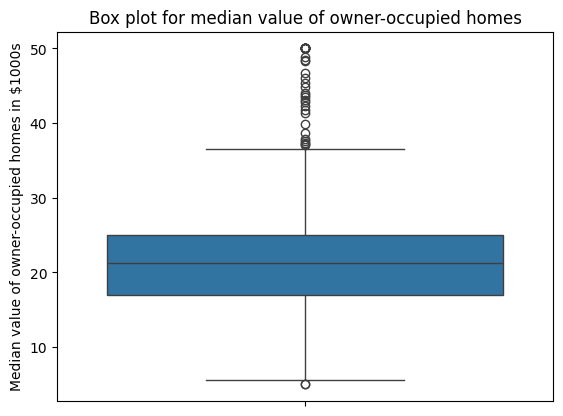

In [23]:
ax1 = sns.boxplot(y='MEDV', data=boston_df)
pyplot.title('Box plot for median value of owner-occupied homes')
pyplot.ylabel('Median value of owner-occupied homes in $1000s')
pyplot.show()

# Barplot for Mean of Median value of owner-occupied homes by Charles River or not

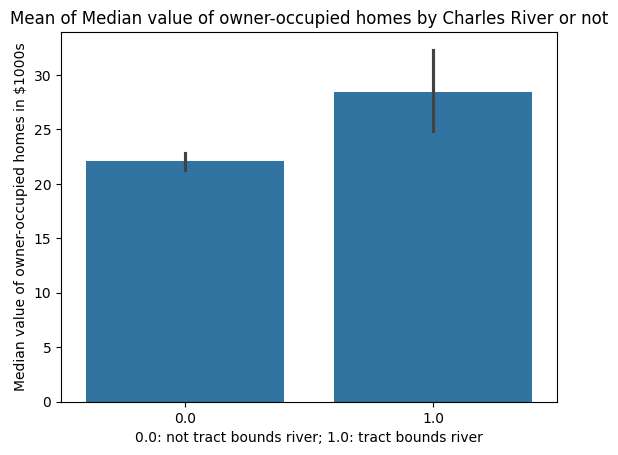

In [30]:
ax2 = sns.barplot(x='CHAS', y='MEDV', data=boston_df)
pyplot.title('Mean of Median value of owner-occupied homes by Charles River or not')
pyplot.ylabel('Median value of owner-occupied homes in $1000s')
pyplot.xlabel('0.0: not tract bounds river; 1.0: tract bounds river')
pyplot.show()

# Boxplot for the MEDV variable vs the AGE variable

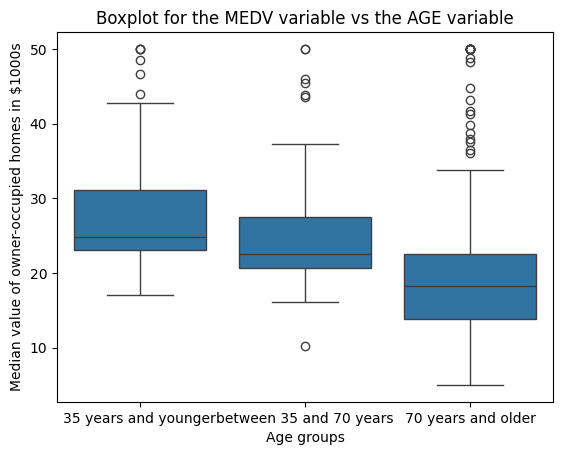

In [31]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'
order = ['35 years and younger','between 35 and 70 years','70 years and older']

ax3 = sns.boxplot(y='MEDV', x='age_group', data=boston_df, order=order)
pyplot.title('Boxplot for the MEDV variable vs the AGE variable')
pyplot.ylabel('Median value of owner-occupied homes in $1000s')
pyplot.xlabel('Age groups')
pyplot.show()

# Scatter plot for Nitric oxide concentrations and the proportion of non-retail business acres per town

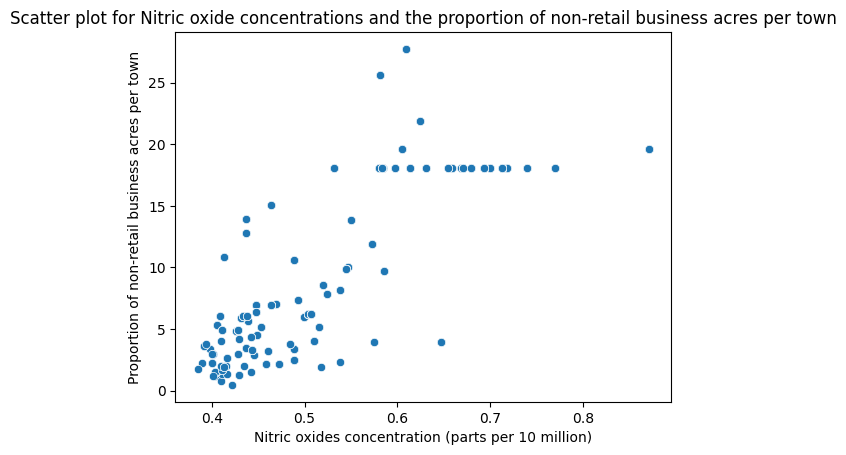

In [32]:
ax4 = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
pyplot.title('Scatter plot for Nitric oxide concentrations and the proportion of non-retail business acres per town')
pyplot.ylabel('Proportion of non-retail business acres per town')
pyplot.xlabel('Nitric oxides concentration (parts per 10 million)')
pyplot.show()

# Histogram for the pupil to teacher ratio variable

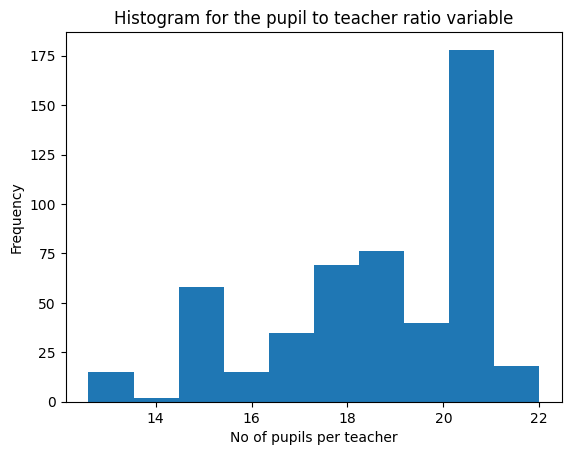

In [10]:
pyplot.hist(boston_df['PTRATIO'])
pyplot.title('Histogram for the pupil to teacher ratio variable')
pyplot.xlabel('No of pupils per teacher')
pyplot.ylabel('Frequency')
pyplot.show()

# Question 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Approach:** t-test for means of price are the same between if close to Charles river

**Null hypothesis:** There is no difference in median value of houses by the Charles river or not.

**Alternative hypothesis:** There is a significant difference in median value of houses by the Charles river or not.

In [47]:
result = scipy.stats.ttest_ind(
    boston_df[boston_df['CHAS'] == 0]['MEDV'],
    boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = True)
print("t-test pvalue = ", result.pvalue)

t-test pvalue =  7.390623170519905e-05


**Conclusion:** Since p-value < 0.05, we reject the null hypothesis of there is no difference in median value of houses by the Charles river or not.

# Question 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Approach:** ANOVA for means of price are the same between different age groups of the owners.

**Null hypothesis:** The means of median values of different owner age groups are the same.

**Alternative hypothesis:** The means of median values of different owner age groups are not the same.

In [48]:
thirdyfive_lower = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thridyfive_to_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirdyfive_lower, thridyfive_to_seventy, seventy_older)
print("ANOVA P-Value: {0}".format(p_value))

ANOVA P-Value: 1.7105011022702984e-15


**Conclusion:** Since p-value is < 0.05, we reject the null hypothesis of the means of Median values are the same.

# Question 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Approach:** Pearson coorelation between nitric oxide concentration and proportion of non-retail business acres per town.

**Null hypothesis:** There is not a correlation between nitric oxide concentration and proportion of non-retail business acres per town.

**Alternative hypothesis:** There is a correlation between nitric oxide concentration and proportion of non-retail business acres per town.

In [45]:
result = scipy.stats.pearsonr(boston_df['NOX'], boston_df['MEDV'])
print("Pearson test p-value: ", result.pvalue)

Pearson test p-value:  7.065041586253293e-24


**Conclusion:** Since p-value is < 0.05, we reject the null hypothesis of there is not a relationship between Nitric oxide concentration and propertion of non-retail business acres per town.

# Question 4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Approach:** Regression analysis for correlation between additional weighted distance to the five Boston employment centres and median value of owner occupied homes.

**Null hypothesis:** There is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

**Alternative hypothesis:** There is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes

In [46]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 17 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        21:21:23   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Conclusion:** Since p-value is < 0.05, there is no impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

**Coefficient:** 1.0916 (Every weighted distance from employment centres incurrs 1.0916 x $1000 in median value.